In [36]:
'''
NAME: ADITYA AGRAWAL
ROLL: 2311010
ASSIGN8: ODE Solving(RK METHOD) 
DATE-23/10/2025
'''


'\nNAME: ADITYA AGRAWAL\nROLL: 2311010\nASSIGN8: ODE Solving(RK METHOD) \nDATE-23/10/2025\n'

In [37]:
import sys
import matplotlib.pyplot as plt

sys.path.append('c:/Users/mayur/ClonedGitRepo/COMPUTATIONAL_PHYSICS/LABWORK')

import adilib_class as ad
import math

In [38]:
def euler_solver(f,y0,x0,xf,dx=.1):
    
    '''
    INPUT:
    f: funct.--->ODE dy/dx=f(x,y)
    y0: initial y---> y(x0)=y0
    x0: initial x
    xf: final x
    dx:step-size
    OUTPUT:
    x_val: array of x val
    y_val: array of y val
    '''
    N=int(math.ceil((xf-x0)/dx))
    x_val=[0]*(N+1)
    y_val=[0]*(N+1)
    x_val[0]=x0
    y_val[0]=y0
    for i in range(1,N+1):
        x_val[i]=x_val[i-1]+dx
        y_val[i]=y_val[i-1]+f(x_val[i-1],y_val[i-1])*dx
    return x_val,y_val

def predictor_corrector_solver(f,y0,x0,xf,dx=.1):

    '''
    INPUT:
    f: funct.--->ODE dy/dx=f(x,y)
    y0: initial y--->y(x0)=y0
    x0: initial x
    xf: final x
    dx: step size
    OUTPUT:
    x_values: array of x val
    y_values: array of y val
    '''
    N=int(math.ceil((xf-x0)/dx))
    x_val, y_val = [0]*(N+1), [0]*(N+1)
    x_val[0],y_val[0]=x0,y0
    for i in range(1,N+1):
        x_val[i]=x_val[i-1]+dx
        y_pred=y_val[i-1]+f(x_val[i-1],y_val[i-1])*dx #predictor(euler)
        # Corrector step (Trapezoidal rule)
        y_val[i]=y_val[i-1]+(f(x_val[i-1],y_val[i-1])+f(x_val[i],y_pred))*dx/2
    return x_val,y_val

In [39]:

def rk4_solver(f,y0,x0,xf,dx=.1):

    '''
    INPUT:
    f: funct.--->ODE dy/dx=f(x,y)
    y0: initial y--->y(x0)=y0
    x0: initial x
    xf: final x
    dx: step size
    OUTPUT:
    x_values: array of x val
    y_values: array of y val
    '''
    N=int(((xf-x0)/dx))
    x_val=[0]*(N+1)
    y_val=[0]*(N+1)
    x_val[0]=x0
    y_val[0]=y0
    for i in range(1,N+1):
        x_val[i]=x_val[i-1]+dx
        k1=dx*f(x_val[i-1],y_val[i-1])
        k2=dx*f(x_val[i-1]+dx/2,y_val[i-1]+k1/2)
        k3=dx*f(x_val[i-1]+dx/2,y_val[i-1]+k2/2)
        k4=dx*f(x_val[i-1]+dx,y_val[i-1]+k3)
        y_val[i]=y_val[i-1]+(k1+2*k2+2*k3+k4)/6 # + order(h^5)....follows from simpson error bound
    return x_val,y_val

def  rk
    

SyntaxError: expected '(' (3988032685.py, line 28)

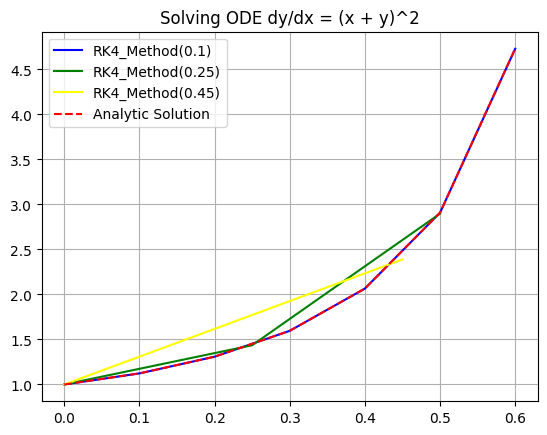

In [ ]:
#_______QUESTION_1______________
f = lambda x,y: (x + y)**2
x0=0
y0=1
xf=math.pi/5
dx=0.1
x_rk4, y_rk4 = rk4_solver(f, y0, x0, xf, dx)
x_rk4_25, y_rk4_25 = rk4_solver(f, y0, x0, xf, .25)
x_rk4_45, y_rk4_45 = rk4_solver(f, y0, x0, xf, .45)
f_analytic = lambda x: (math.tan(x+ math.pi/4) - x)
plt.plot(x_rk4, y_rk4, label='RK4_Method(0.1)', color='blue')
plt.plot(x_rk4_25, y_rk4_25, label='RK4_Method(0.25)', color='green')
plt.plot(x_rk4_45, y_rk4_45, label='RK4_Method(0.45)', color='yellow')
plt.plot(x_rk4, [f_analytic(x) for x in x_rk4], label='Analytic Solution', color='red', linestyle='dashed')
plt.title('Solving ODE dy/dx = (x + y)^2')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# RK4 for systems (vector y) and damped simple harmonic oscillator solver
def rk4_system_solver(f, y0, t0, tf, dt=0.01):
    """
    Solve dy/dt = f(t, y) where y can be a vector (list or tuple).
    Inputs:
      f: function f(t, y) -> list/tuple of derivatives same length as y
      y0: initial state (list or tuple)
      t0: initial time
      tf: final time
      dt: time-step
    Returns:
      t_vals: list of times, y_vals: list of state vectors
    """
    import math
    N = int(math.ceil((tf - t0) / dt))
    t_vals = [0] * (N + 1)
    y_vals = [None] * (N + 1)
    t_vals[0] = t0
    y_vals[0] = list(y0)
    for i in range(1, N + 1):
        t_prev = t_vals[i-1]
        y_prev = y_vals[i-1]
        t_vals[i] = t_prev + dt
        # compute k1..k4 as vectors
        k1 = [dt * val for val in f(t_prev, y_prev)]
        y_k2 = [y_prev[j] + 0.5 * k1[j] for j in range(len(y_prev))]
        k2 = [dt * val for val in f(t_prev + dt/2, y_k2)]
        y_k3 = [y_prev[j] + 0.5 * k2[j] for j in range(len(y_prev))]
        k3 = [dt * val for val in f(t_prev + dt/2, y_k3)]
        y_k4 = [y_prev[j] + k3[j] for j in range(len(y_prev))]
        k4 = [dt * val for val in f(t_prev + dt, y_k4)]
        y_next = [y_prev[j] + (k1[j] + 2*k2[j] + 2*k3[j] + k4[j]) / 6.0 for j in range(len(y_prev))]
        y_vals[i] = y_next
    return t_vals, y_vals

def solve_damped_sho(x0=1.0, v0=0.0, m=1.0, k=1.0, mu=0.15, t0=0.0, tf=40.0, dt=0.01):
    """
    Solve x'' + mu*x' + (k/m) x = 0 using RK4 on the system y = [x, v].
    Returns arrays t, x, v, E where E = 0.5*m*v^2 + 0.5*k*x^2
    """
    def f(t, y):
        x, v = y[0], y[1]
        dxdt = v
        dvdt = -mu * v - (k / m) * x
        return [dxdt, dvdt]
    t_vals, y_vals = rk4_system_solver(f, [x0, v0], t0, tf, dt)
    x_vals = [s[0] for s in y_vals]
    v_vals = [s[1] for s in y_vals]
    E_vals = [0.5 * m * v_vals[i]**2 + 0.5 * k * x_vals[i]**2 for i in range(len(x_vals))]
    return t_vals, x_vals, v_vals, E_vals

In [ ]:
# Run the damped SHO solver and plot x(t), v(t), and total energy E(t)
mu = 0.15
k = 1.0
m = 1.0
t0, tf = 0.0, 40.0
dt = 0.01
t_vals, x_vals, v_vals, E_vals = solve_damped_sho(x0=1.0, v0=0.0, m=m, k=k, mu=mu, t0=t0, tf=tf, dt=dt)
# convert to matplotlib-friendly lists (they already are lists) and plot
plt.figure(figsize=(10, 6))
plt.subplot(3,1,1)
plt.plot(t_vals, x_vals, label='x(t)')
plt.ylabel('x')
plt.grid(True)
plt.legend()

plt.subplot(3,1,2)
plt.plot(t_vals, v_vals, label='v(t)', color='orange')
plt.ylabel('v')
plt.grid(True)
plt.legend()

plt.subplot(3,1,3)
plt.plot(t_vals, E_vals, label='Total Energy E(t)', color='green')
plt.xlabel('t')
plt.ylabel('E')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()